In [41]:
import os

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from rdkit import Chem
from rdkit import RDLogger

In [42]:
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [3]:
data_path = os.path.join("..", "data", "ligand")

In [16]:
distribution = [0] * 10
largest = 0
for pdbf in tqdm(list(os.scandir(data_path)), desc="Scanning"):
    if not pdbf.name.endswith(".pdb"):
        continue
    with open(pdbf.path, "r") as inf:
        counter = 0
        lines = inf.readlines()
        for line in lines:
            if "HETATM" in line:
                counter += 1
    if counter == 1:
        distribution[0] += 1
    elif counter == 2:
        distribution[1] += 1
    elif counter == 3:
        distribution[2] += 1
    elif counter == 4:
        distribution[3] += 1
    elif counter == 5:
        distribution[4] += 1
    elif 5 < counter < 25:
        distribution[5] += 1
    elif 25 <= counter < 50:
        distribution[6] += 1
    elif 50 <= counter < 150:
        distribution[7] += 1
    elif 150 <= counter <= 300:
        distribution[8] += 1
    else:
        distribution[9] += 1
        
    if counter > largest:
        largest = counter

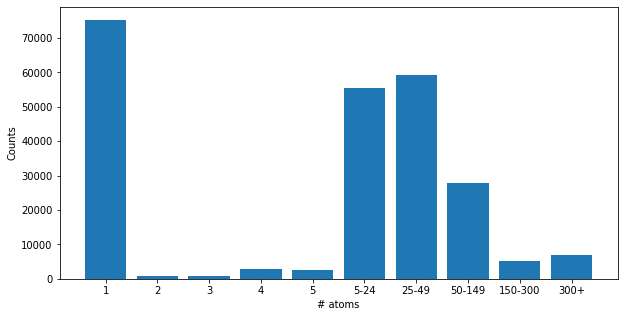

In [27]:
plt.subplots(1, 1, figsize=(10, 5))
_ = plt.bar(["1", "2", "3", "4", "5", "5-24", "25-49", "50-149", "150-300", "300+"], distribution)
plt.xlabel("# atoms")
plt.ylabel("Counts")
plt.savefig("ligand_distribution.png", dpi=150)

In [18]:
distribution

[75271, 806, 755, 2727, 2446, 55350, 59150, 27977, 5257, 6844]

In [19]:
largest

86569

In [43]:
ghose_distribution = [0] * 3
for pdbf in tqdm(list(os.scandir(data_path)), desc="Scanning"):
    if not pdbf.name.endswith(".pdb"):
        continue
    with open(pdbf.path, "r") as inf:
        counter = 0
        lines = inf.readlines()
        for line in lines:
            if "HETATM" in line:
                counter += 1
    if counter < 4 or counter > 300:
        continue
    elif Chem.MolFromPDBFile(pdbf.path) is None:
        continue
    elif 4 <= counter < 20:
        ghose_distribution[0] += 1
    elif 20 <= counter <= 70:
        ghose_distribution[1] += 1
    else:
        ghose_distribution[2] += 1

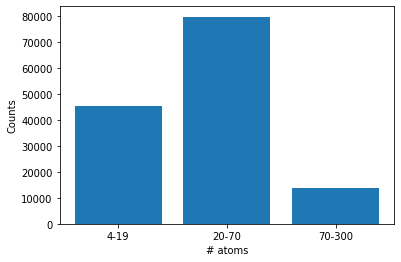

In [44]:
plt.subplots(1, 1)
_ = plt.bar(["4-19", "20-70", "70-300"], ghose_distribution)
plt.xlabel("# atoms")
plt.ylabel("Counts")
plt.savefig("ghose_filtered_ligand_distribution.png", dpi=150)

In [46]:
ghose_distribution

[45248, 79769, 13863]